### Student Information
Name: 徐迺茜

Student ID: 109065504

GitHub ID: s105021127

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

## Part 1: Take Home Exercises

In [122]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [124]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [125]:
import pandas as pd # 引用套件並縮寫為 pd

# my functions (這啥)
import helpers.data_mining_helpers as dmh

# construct dataframe from a list /用法:https://www.cjavapy.com/article/228/
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [126]:
# add category to the dataframe
X['category'] = twenty_train.target

In [127]:
# add category label also (不懂為什麼不像上面那種方法寫)
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
result = X # For Part4

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [64]:
X.query('category == 1')[:10] #是不是只能用在int阿

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics


In [65]:
X.sort_index().loc[1:6]

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [66]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [67]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here

1. According to the above example, we can know that Pandas will treat '(STRING)' as strings instead of missing data. For example:'None','NaN' and ''. This causes isnull() to show False values.
2. If you want to show missing data, isnull() only detect values like None or numpy.NaN.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here

1. add 3 columns ('text','category','category_name'), and corresponding datas.
2. add a missing data (called dummy_series), and use dropna(inplace=True) to delete it.
3. add duplicated dummy records (called dummy_duplicate_dict), and use drop_duplicates(keep=False, inplace=True) to delete them.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [68]:
X_sample = X.sample(n=1000) #random state

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

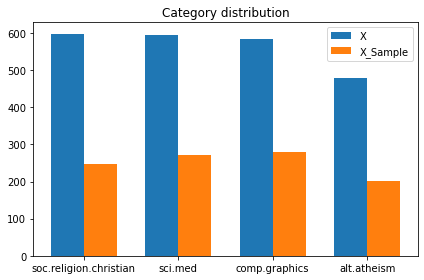

In [70]:
# Answer here

original = [X.category_name.value_counts()['soc.religion.christian'], 
            X.category_name.value_counts()['sci.med'],
            X.category_name.value_counts()['comp.graphics'],
            X.category_name.value_counts()['alt.atheism']]

sample = [X_sample.category_name.value_counts()['soc.religion.christian'], 
          X_sample.category_name.value_counts()['sci.med'],
          X_sample.category_name.value_counts()['comp.graphics'],
          X_sample.category_name.value_counts()['alt.atheism']]

group_labels = ['soc.religion.christian', 'sci.med','comp.graphics','alt.atheism']

xx = np.arange(len(group_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(xx - width/2, original, width, label='X')
rects2 = ax.bar(xx + width/2, sample, width, label='X_Sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(xx)
ax.set_xticklabels(group_labels)
ax.legend()

fig.tight_layout()

plt.show()
 

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #可以知道一個 text有幾個string?

In [72]:
# Answer here
for t in range(100):
    if X_counts[4, t:t+1].toarray() == 1:
         print(count_vect.get_feature_names()[t:t+1])

['00']
['01']


### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

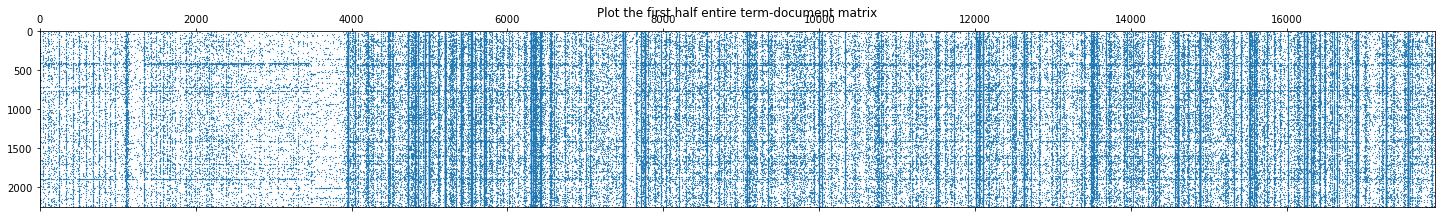

In [73]:
import seaborn as sns
# Plot the first half entire term-document matrix

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:17894]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]] # 即 doc_0,...,doc_19
plot_z = X_counts[:,0:17894].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.figure(figsize=(25, 25))
plt.title('Plot the first half entire term-document matrix')
plt.spy(df_todraw, markersize=0.25)

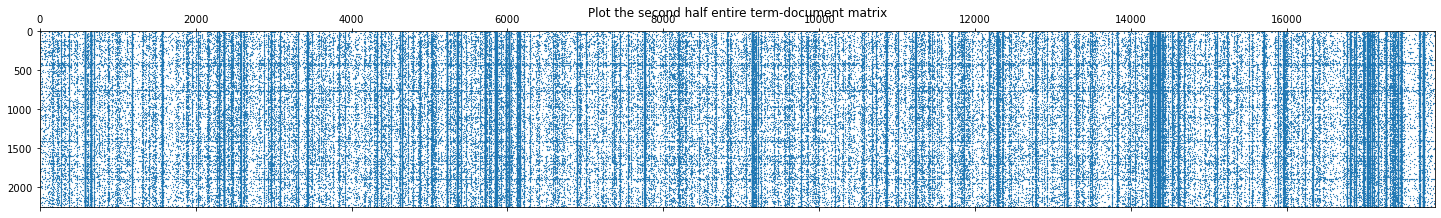

In [74]:
# Plot the second half entire term-document matrix

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[17894:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]] # 即 doc_0,...,doc_19
plot_z = X_counts[:,17894:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.figure(figsize=(25, 25))
plt.title('Plot the second half entire term-document matrix')
plt.spy(df_todraw, markersize=0.25)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [75]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [76]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

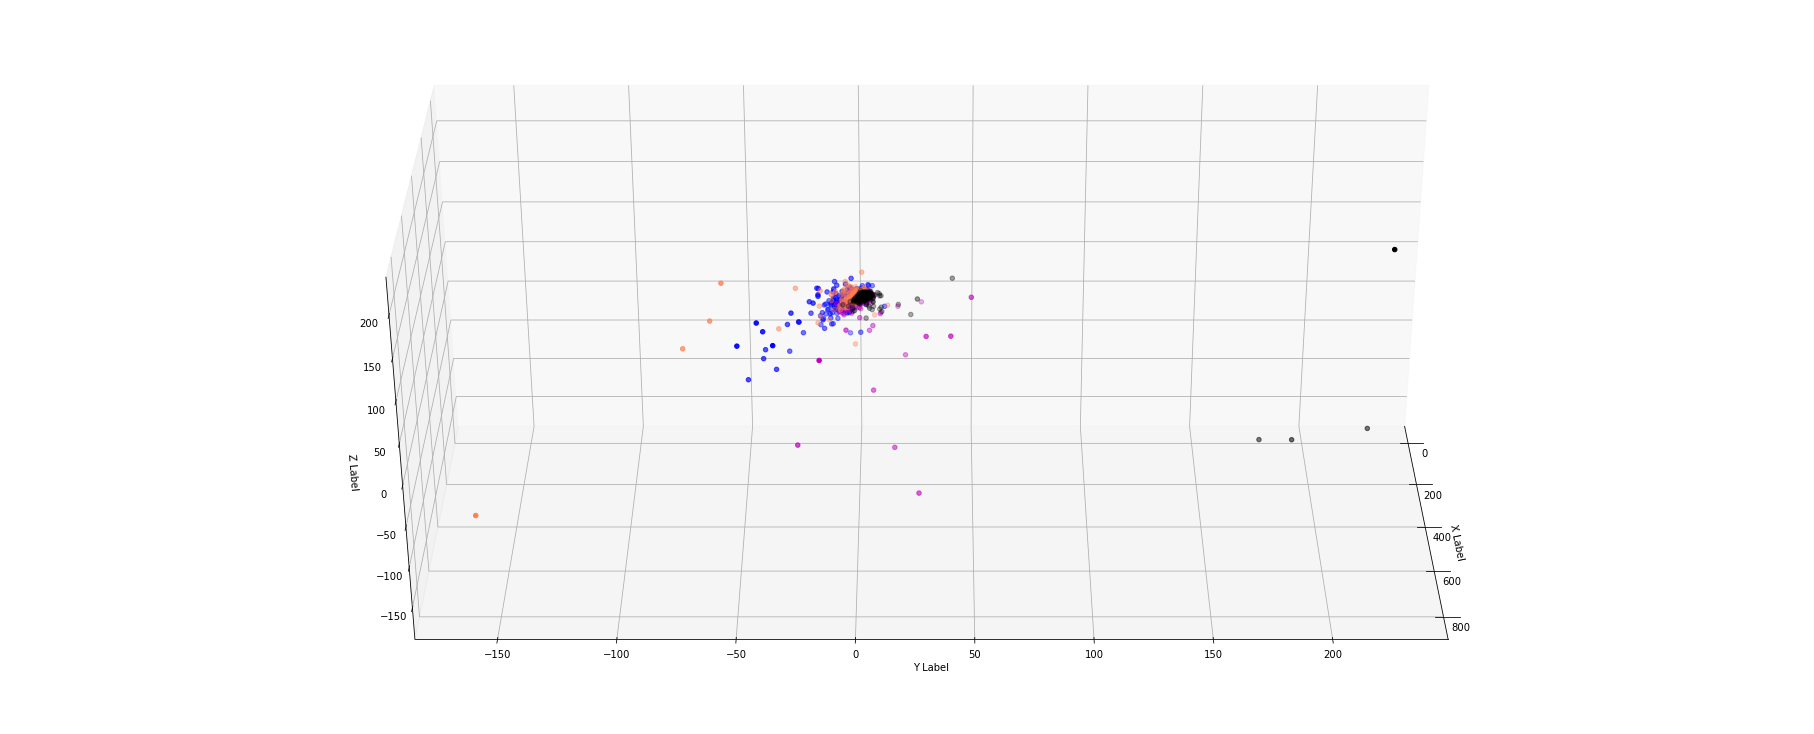

In [77]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig) # include Axes3D

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o') # scatter:散步圖

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 0) # 3D繪圖視角轉換
plt.show()

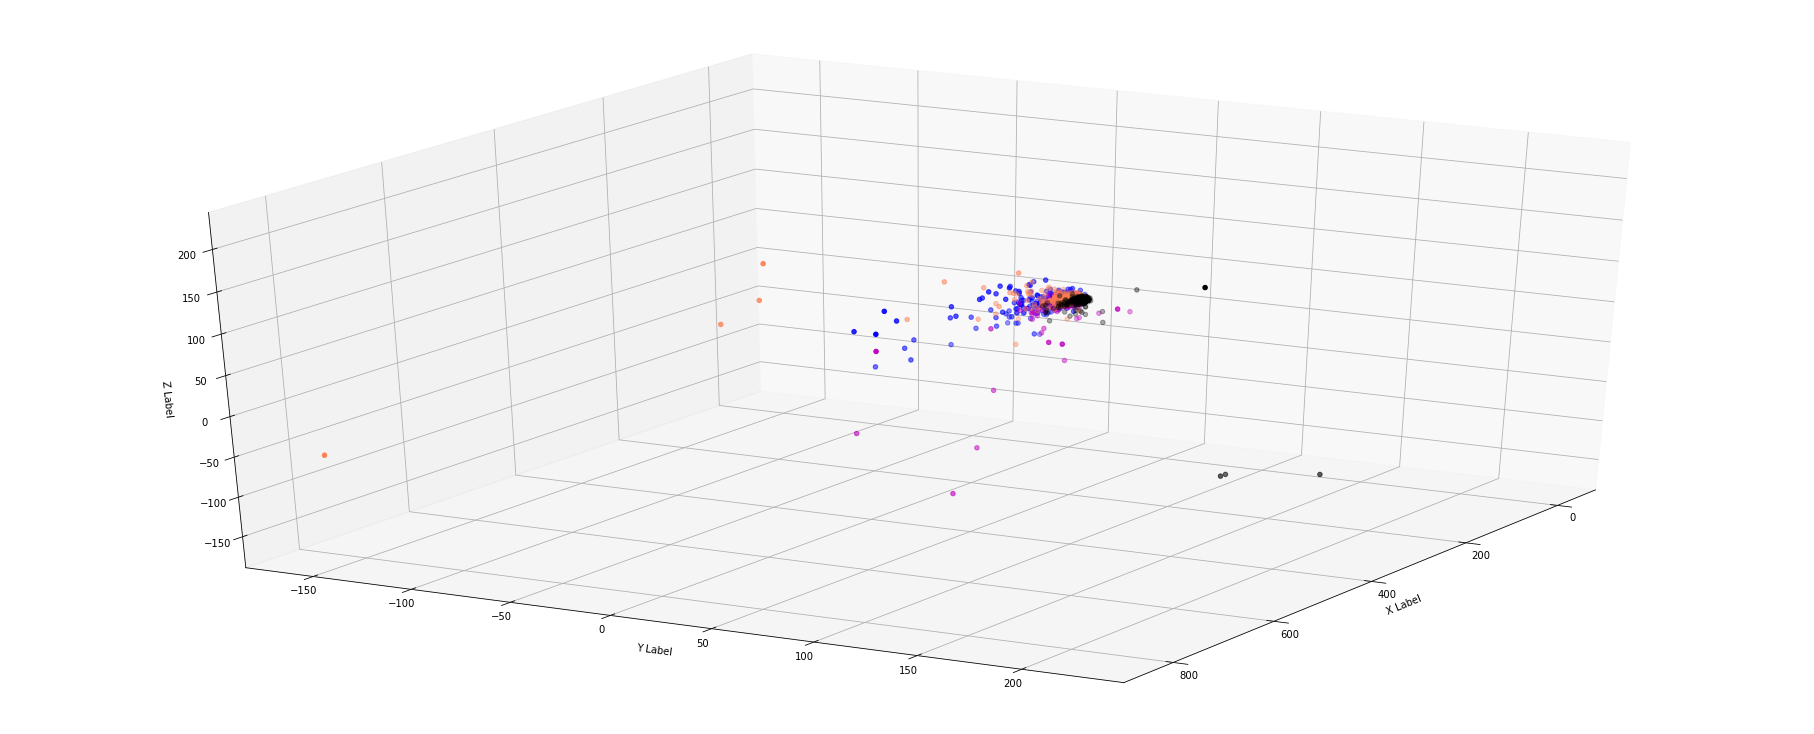

In [78]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig) # include Axes3D

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o') # scatter:散步圖

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 30) # 3D繪圖視角轉換
plt.show()

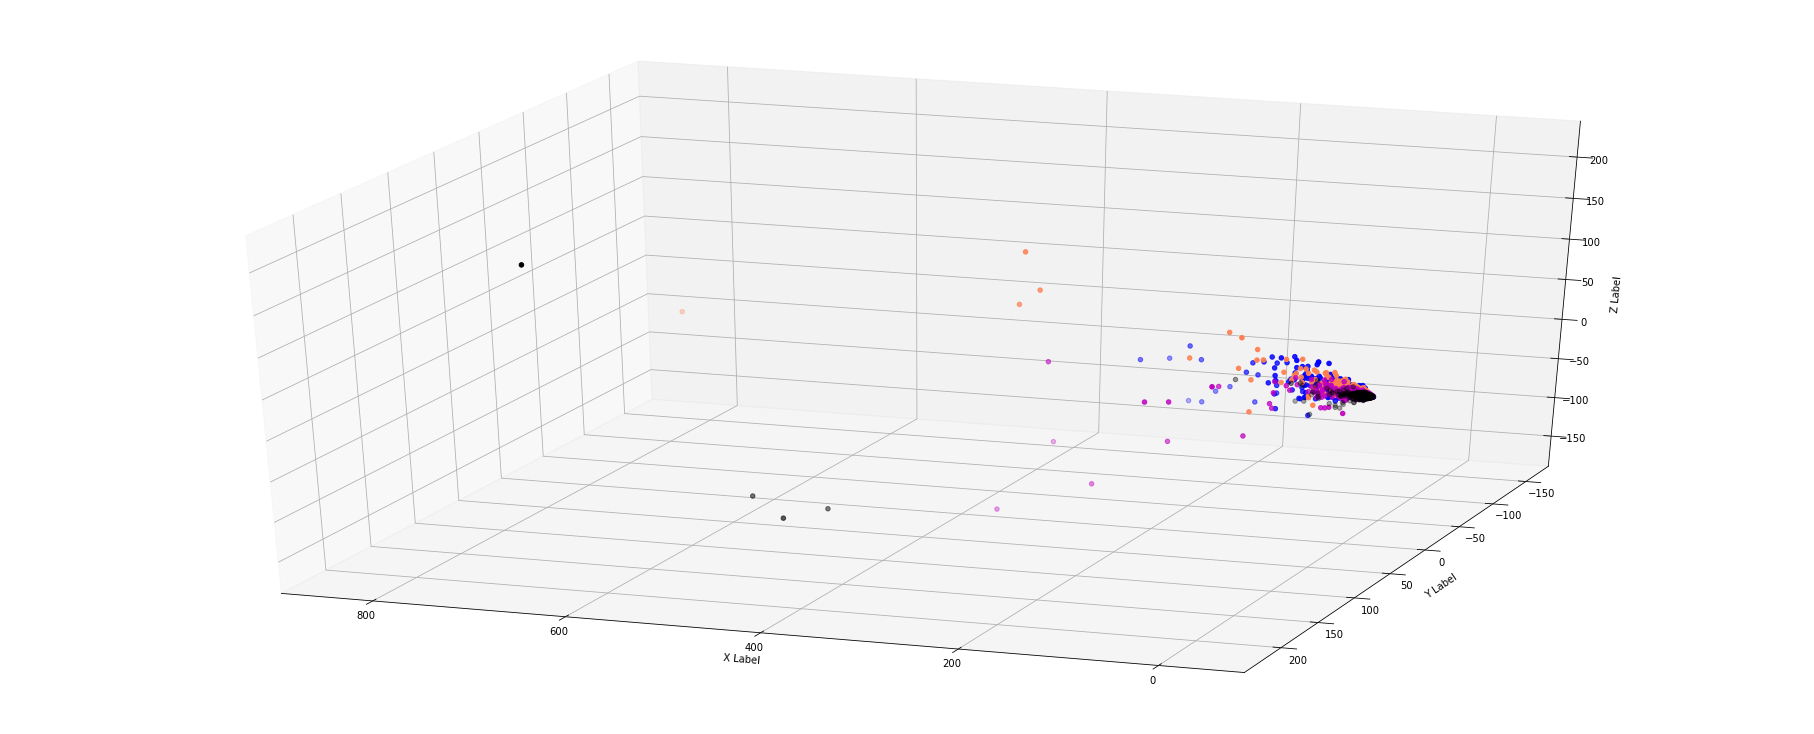

In [79]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig) # include Axes3D

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o') # scatter:散步圖

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 110) # 3D繪圖視角轉換
plt.show()

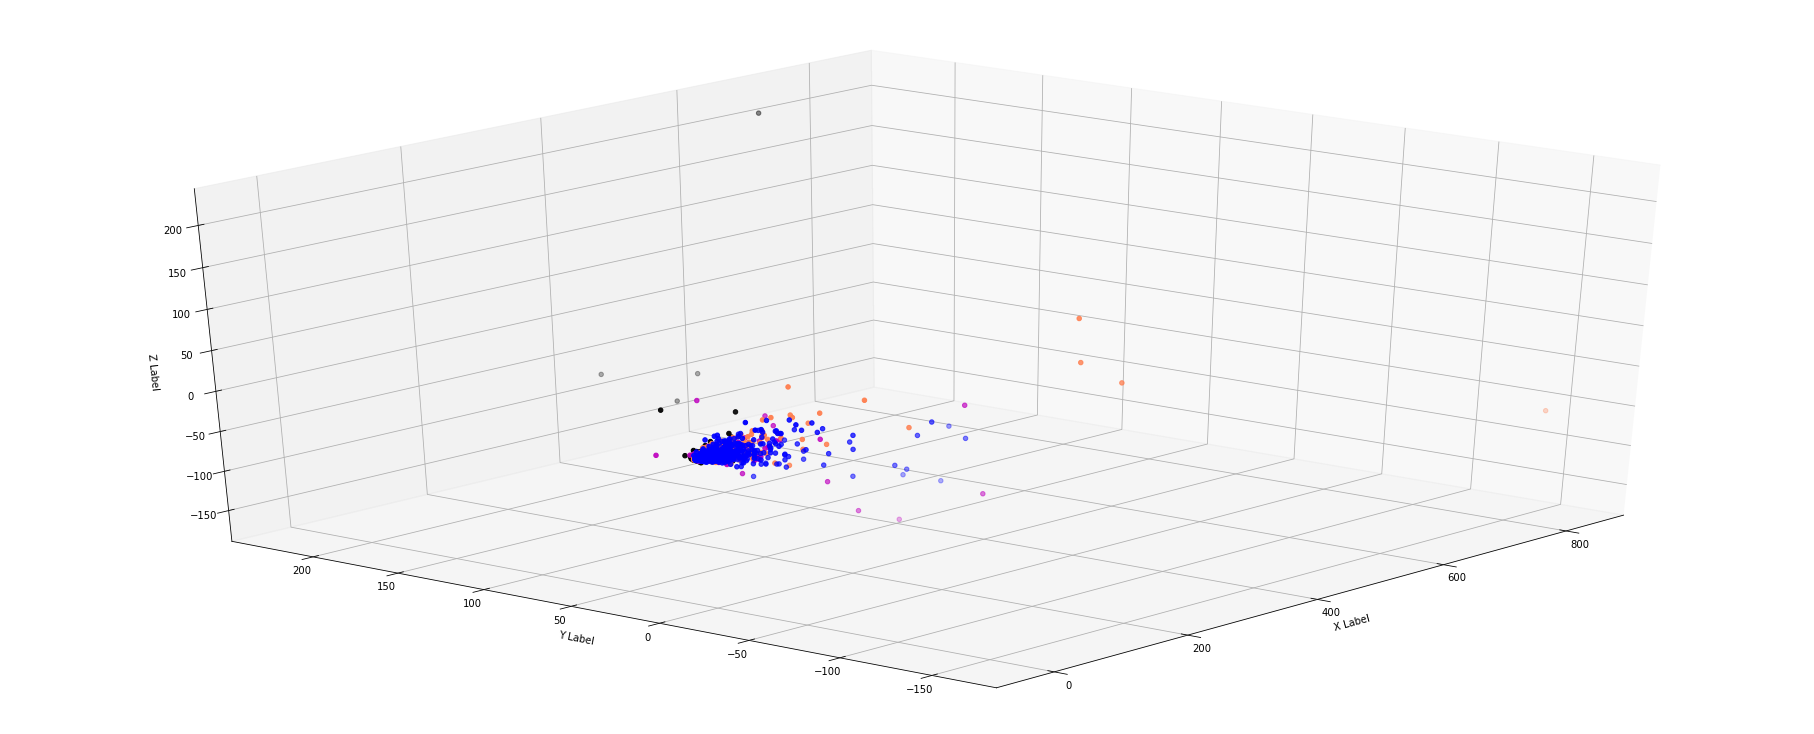

In [80]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig) # include Axes3D

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o') # scatter:散步圖

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 220) # 3D繪圖視角轉換
plt.show()

#### Describe

1. If angle = 0, we can see from left to right: blue magenta coral black and magenta points are the least point that we can see in this angle. 
2. If angle = 30, we can see from left to right: blue magenta coral black and magenta points are the least point that we can see in this angle. 
3. If angle = 110, the most red points can be seen compared to other angles.
4. If angle = 220, we can be found that most of the blue points are in the observer’s perspective.
5. It can be seen from the four 3D pictures that all points are particularly concentrated in a certain area.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [81]:
import plotly.express as px

In [82]:
term_frequencies = X_counts.toarray().sum(axis=0)
len(term_frequencies)

35788

In [83]:
# using plotly to show interactive visualization among first 50 terms
df_term_freq = pd.DataFrame({'freq': term_frequencies})

fig = px.bar(df_term_freq[:50], y='freq')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [84]:
# Answer here
threshold = 50
term_high_frequencies = term_frequencies[term_frequencies > threshold]

len(term_high_frequencies)

1614

In [85]:
# using plotly to show interactive visualization among first 50 terms
df_term_freq = pd.DataFrame({'freq': term_high_frequencies})

fig = px.bar(df_term_freq[:50], y='freq')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

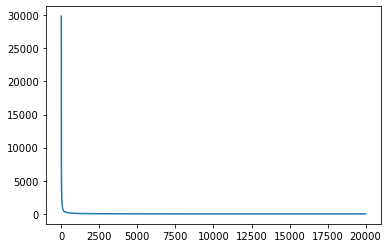

In [86]:
# plot term frequency distribution in descending order
N = 20000
index = np.arange(N)
term_frequencies_sorted = np.sort(term_frequencies)[::-1]

plt.plot(index, term_frequencies_sorted[:N])
plt.show()

In [87]:
import math

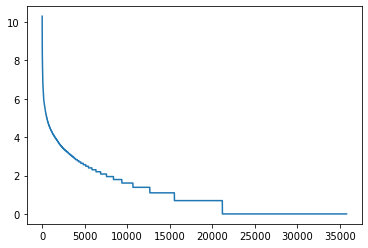

In [88]:
# plot term frequency log distribution in descending order
term_frequencies_log = [math.log(i) for i in term_frequencies]

N = X_counts.shape[1]
index = np.arange(N)
term_frequencies_log_sorted = np.sort(term_frequencies_log)[::-1]

plt.plot(index, term_frequencies_log_sorted[:N])
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

#### Answer here
YES

In [89]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [90]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [91]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [92]:
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


---

## Part 2 : Follow the same process on the new dataset

### 1. Data Preparation

In [93]:
import os
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import helpers.data_mining_helpers as dmh # my functions

In [150]:
# setting your own relative data_path for trainning set
df_imdb = []
df_amazon = []
df_yelp = []
df_data = []

# read the text files and then put them into [x,y] sets.
for inputline in open("imdb_labelled.txt", "r", encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    df_imdb.append([x.strip(), y.strip(), 'imdb'])
for inputline in open("amazon_cells_labelled.txt", "r", encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    df_imdb.append([x.strip(), y.strip(), 'amazon'])
for inputline in open("yelp_labelled.txt", "r", encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    df_imdb.append([x.strip(), y.strip(), 'yelp'])

# add the arrays up to form our complete dataset.

df_data = df_imdb + df_amazon + df_yelp

df_data[0:10]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
  '0',
  'imdb'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
  '0',
  'imdb'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
  '0',
  'imdb'],
 ['Very little music or anything to speak of.', '0', 'imdb'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.',
  '1',
  'imdb'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",
  '0',
  'imdb'],
 ['Wasted two hours.', '0', 'imdb'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.',
  '1',
  'imdb'],
 ['A bit predictable.', '0', 'imdb'],
 ['Loved the casting of Jimmy Buffet as the science teac

In [145]:
len(df_data)

3000

---

## 2. Data Transformation

### 2.1 Converting Dictionary into Pandas Dataframe

In [157]:
Y = pd.DataFrame(df_data, columns= ['text','number','file'])
Y

,text,number,file
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


---

### 2.2 Familiarizing yourself with the Data

In [158]:
Y.loc[::10, 'text'][0:10]

0     A very, very, very slow-moving, aimless movie ...
10                   And those baby owls were adorable.
20    I can think of no other film where something v...
30    There are massive levels, massive unlockable c...
40    The very idea of it was lame - take a minor ch...
50    I'm glad the film didn't go for the most obvio...
60                      I sat riveted to the TV screen.
70        And, quite honestly, often its not very good.
80    I'm glad this pretentious piece of s*** didn't...
90                       Definitely worth checking out.
Name: text, dtype: object

In [162]:
Y.sort_index().loc[1:6]

,text,number,file
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
5,"The rest of the movie lacks art, charm, meanin...",0,imdb
6,Wasted two hours.,0,imdb


In [163]:
Y.loc[lambda f: f.number == '1'].iloc[::10, :][0:5]

,text,number,file
4,The best scene in the movie was when Gerardo i...,1,imdb
18,It's practically perfect in all of them  a tr...,1,imdb
30,"There are massive levels, massive unlockable c...",1,imdb
51,In addition to having one of the most lovely s...,1,imdb
73,There are some generally great things in it.,1,imdb


---

### 3.  Data Preprocessing

#### 3.1 Sampling

In [164]:
Y_sample = Y.sample(n=1000) #random state
Y_sample[0:10]

,text,number,file
886,Avoid at any and all costs.,0,imdb
2851,I probably would not go here again.,0,yelp
916,Excellent short film.,1,imdb
1950,It is a joy to use.,1,amazon
1611,clipping this to your belt will deffinitely ma...,1,amazon
83,"Overall, the film is interesting and thought-p...",1,imdb
956,But it picked up speed and got right to the po...,1,imdb
835,It's very slow.,0,imdb
587,There is no plot here to keep you going in the...,0,imdb
2649,We won't be going back anytime soon!,0,yelp


yelp      1000
imdb      1000
amazon    1000
Name: file, dtype: int64


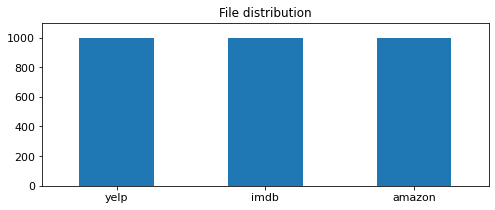

In [166]:
upper_bound = max(Y.file.value_counts()) + 100

print(Y.file.value_counts())

# plot barchart for Y
X.file.value_counts().plot(kind = 'bar',
                           title = 'File distribution',
                           ylim = [0, upper_bound],        
                           rot = 0, fontsize = 11, figsize = (8,3))

amazon    340
imdb      333
yelp      327
Name: file, dtype: int64


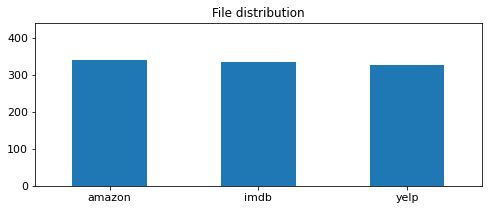

In [167]:
upper_bound = max(Y_sample.file.value_counts()) + 100

print(Y_sample.file.value_counts())

# plot barchart for Y_sample
Y_sample.file.value_counts().plot(kind = 'bar',
                                  title = 'File distribution',
                                  ylim = [0, upper_bound],        
                                  rot = 0, fontsize = 11, figsize = (8,3))

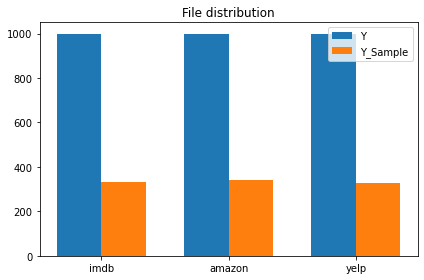

In [168]:
original = [Y.file.value_counts()['imdb'], 
            Y.file.value_counts()['amazon'],
            Y.file.value_counts()['yelp']]

sample = [Y_sample.file.value_counts()['imdb'], 
          Y_sample.file.value_counts()['amazon'],
          Y_sample.file.value_counts()['yelp']]

group_labels = ['imdb', 'amazon','yelp']

yy = np.arange(len(group_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ay = plt.subplots()
rects1 = ay.bar(yy - width/2, original, width, label='Y')
rects2 = ay.bar(yy + width/2, sample, width, label='Y_Sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ay.set_title('File distribution')
ay.set_xticks(yy)
ay.set_xticklabels(group_labels)
ay.legend()

fig.tight_layout()

plt.show()

---

### 3.2 Feature Creation

In [169]:
import nltk

In [171]:
Y['unigrams'] = Y['text'].apply(lambda x: dmh.tokenize_text(x))
Y[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

---

### 3.3 Feature subset selection

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Y_counts = count_vect.fit_transform(Y.text)

analyze = count_vect.build_analyzer()
analyze(" ".join(list(Y[:1].text)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [228]:
Y_counts.shape
Y_counts[0:20, 4].toarray()

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

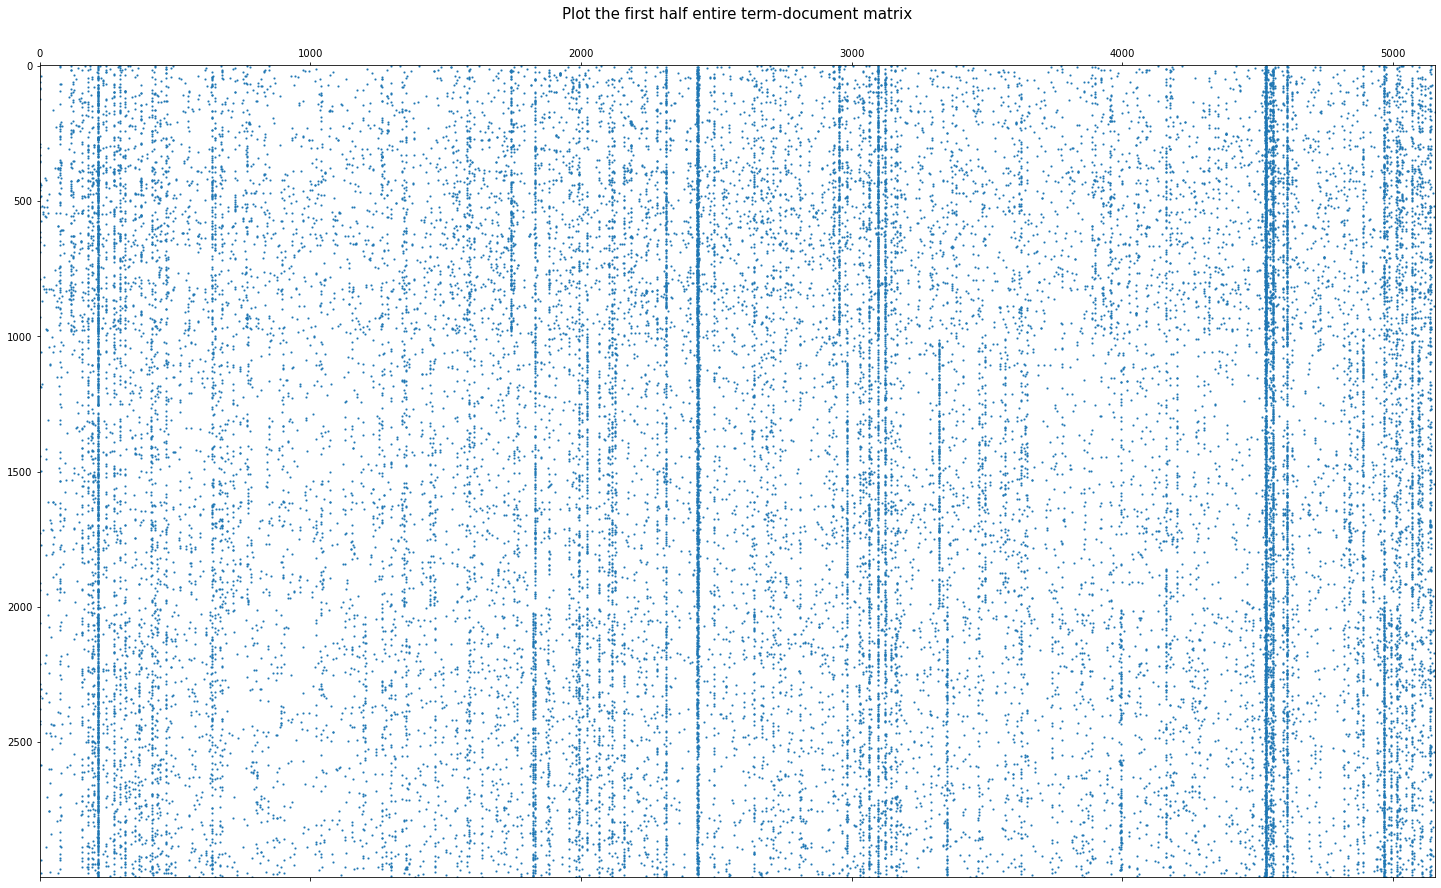

In [180]:
import seaborn as sns
# Plot the first half entire term-document matrix

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:]] # 即 doc_0,...,doc_19
plot_z = Y_counts[0:,0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.figure(figsize=(25, 25))
plt.title('Plot the first half entire term-document matrix', size = 15)
plt.spy(df_todraw, markersize=1)

---

## Part 3 : Generation

### 1. Generate meaningful new data visualizations

In [232]:
# term frequency count in positive comments
pos_term_frequencies = Y_counts[(Y['number'] == '1').values].toarray().sum(axis=0)

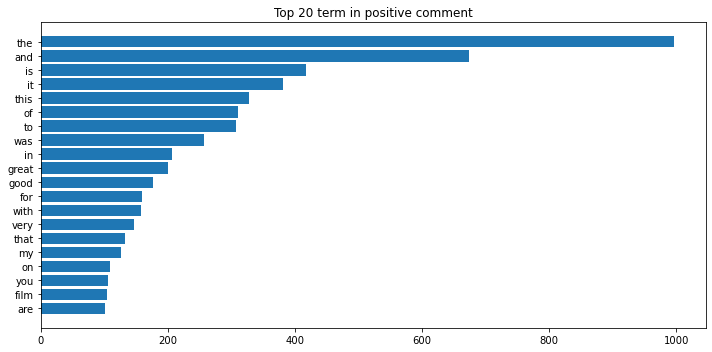

In [235]:
# plot the top 20 term with most appearance in positive comment

N = 20
index = np.arange(N)

pos_top_20_term = []
for i in np.argsort(pos_term_frequencies)[::-1][:N]:
    pos_top_20_term.append(count_vect.get_feature_names()[i])
y = np.sort(pos_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

ax.set_title('Top 20 term in positive comment')
ax.barh(index, y, align='center')
ax.set_yticks(index)
ax.set_yticklabels(pos_top_20_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

---

### 2. Generate TF-IDF features

In [182]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [191]:
# generate tfidf features
tfidf_vect = TfidfVectorizer()
df_tfidf = tfidf_vect.fit_transform(Y.text)
df_tfidf.shape

(3000, 5155)

In [196]:
tfidf_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [193]:
#print out the tfidf features' name
Y_txtt = df_tfidf.toarray()
Y_tfidf = pd.DataFrame(Y_txtt, columns = count_vect.get_feature_names())
print(Y_tfidf)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


---

### 3. Implement a simple Naive Bayes classifier

In [197]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [198]:
# Use term frequency features to build classifiers.

x = Y_counts
y = Y['number']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8196666666666668

In [199]:
# Use tfidf features to build classifiers.

x = Y_tfidf
y = Y['number']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8246666666666667

#### Observation
The result of using tfidf features to build classifiers is larger than the result of using term frequency features to build classifiers.

---

## Part 4 : improve the Data preprocessing

### Initialize X
Initialize X before starting to discuss the data preprocessing improvement.

In [128]:
X = result
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


---

### (1) Dealing with Duplicate Data
In class, We have added the dummy duplicates to X and get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [135]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [136]:
X = X.append(dummy_duplicate_dict, ignore_index=True)
len(X)

2259

In [137]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

2257

Although "dummy_duplicate_dict" are dummy duplicates, we can still keep a copy of the data instead of deleting all duplicate data. In this way, the data will not be reduced too much. I modify that with the following line of code:

In [138]:
result = X.append(dummy_duplicate_dict, ignore_index=True)
len(result)

2259

In [142]:
result.drop_duplicates(inplace=True)
result

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


----